In [2]:
from zipfile import ZipFile
filename="/jupyter notebook/skin-leison/skin-images.zip"

with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("done")

done


In [3]:
import pandas as pd
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
import os
train_df = pd.read_csv("D:\jupyter notebook\skin-leison\skin_labels.csv")
train_df


,Unnamed: 0,imagejpg,hairless_breed,normal_skin,drawn_area,erythema_score,hairlessness_score,lichenification_score,excoriation_score,other_lesions,body_parts
0,0,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfl1yb0006386cut6dj9ys.png,0.0,2.0,0.0,0.0,hyperpigmentation,flank_(sides)
1,1,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfmal1000m386curpzvzvm.png,0.0,1.0,0.0,0.0,hyperpigmentation,flank_(sides)
2,2,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfnp4j0019386ccy9wzlkz.png,1.0,2.0,0.0,1.0,nodule/_cyst/_papule,unsure_/_can't_tell
3,3,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfoxp6001q386cm6i374x1.png,0.0,2.0,0.0,0.0,comedone,unsure_/_can't_tell
4,4,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfq0ip0026386c0xng4lrd.png,0.0,2.0,1.0,1.0,hyperpigmentation,unsure_/_can't_tell
...,...,...,...,...,...,...,...,...,...,...,...
16216,20176,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0uwn9t300883p6a5n2mfwyr.png,1.0,2.0,0.0,0.0,"other_(e.g._pus,_blood,_ear_discharge_etc)",unsure_/_can't_tell
16217,20177,https://storage.googleapis.com/assets.vet-ai.c...,no,yes_(normal),NaN,1.0,0.0,0.0,0.0,NaN,periocular_(around_eyes)
16218,20178,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0uwozq200933p6aaqswarav.png,2.0,2.0,0.0,1.0,NaN,face
16219,20179,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0uwpyo2009p3p6apmi6h3bc.png,1.0,2.0,0.0,2.0,NaN,face


In [4]:
def modiname(x):
    x = x[49:]
    return x

In [5]:
train_df["new_imagejpg"] = train_df["imagejpg"].apply(modiname)
train_df

,Unnamed: 0,imagejpg,hairless_breed,normal_skin,drawn_area,erythema_score,hairlessness_score,lichenification_score,excoriation_score,other_lesions,body_parts,new_imagejpg
0,0,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfl1yb0006386cut6dj9ys.png,0.0,2.0,0.0,0.0,hyperpigmentation,flank_(sides),35fe8d4c-5a9d-4fa1-a43e-2137856dc2a7.jpeg
1,1,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfmal1000m386curpzvzvm.png,0.0,1.0,0.0,0.0,hyperpigmentation,flank_(sides),35fe8d4c-5a9d-4fa1-a43e-2137856dc2a7.jpeg
2,2,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfnp4j0019386ccy9wzlkz.png,1.0,2.0,0.0,1.0,nodule/_cyst/_papule,unsure_/_can't_tell,4cbc559e-602a-413d-bec0-d4cd9df29f5c.jpeg
3,3,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfoxp6001q386cm6i374x1.png,0.0,2.0,0.0,0.0,comedone,unsure_/_can't_tell,4cbc559e-602a-413d-bec0-d4cd9df29f5c.jpeg
4,4,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfq0ip0026386c0xng4lrd.png,0.0,2.0,1.0,1.0,hyperpigmentation,unsure_/_can't_tell,4cbc559e-602a-413d-bec0-d4cd9df29f5c.jpeg
...,...,...,...,...,...,...,...,...,...,...,...,...
16216,20176,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0uwn9t300883p6a5n2mfwyr.png,1.0,2.0,0.0,0.0,"other_(e.g._pus,_blood,_ear_discharge_etc)",unsure_/_can't_tell,5f87e71a-5966-4490-86af-3181cd97d6db.png
16217,20177,https://storage.googleapis.com/assets.vet-ai.c...,no,yes_(normal),NaN,1.0,0.0,0.0,0.0,NaN,periocular_(around_eyes),fd0a4a35-e90b-404b-9059-2c781099586f.png
16218,20178,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0uwozq200933p6aaqswarav.png,2.0,2.0,0.0,1.0,NaN,face,239bb3d9-8cb7-4826-bffd-99a6b8d953de.jpeg
16219,20179,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0uwpyo2009p3p6apmi6h3bc.png,1.0,2.0,0.0,2.0,NaN,face,60846918-4f32-473f-9813-b18493f62983.jpeg


In [6]:
#preprocessing
data1 = train_df
data2=data1[-data1.normal_skin.isin(['yes_(normal)'])]
# change images name
data3 = data2.dropna(subset = ['normal_skin','erythema_score','hairlessness_score','lichenification_score','excoriation_score','other_lesions'])
data3.drop_duplicates(subset=['new_imagejpg', 'imagejpg'],inplace=True)
# data3.loc[data3['new_imagejpg'] == '35fe8d4c-5a9d-4fa1-a43e-2137856dc2a7.jpeg']

c:\programdata\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:

data3["erythema_score"] = pd.to_numeric(data3["erythema_score"], downcast = 'integer')
data3["hairlessness_score"] = pd.to_numeric(data3["hairlessness_score"], downcast = 'integer')
data3["lichenification_score"] = pd.to_numeric(data3["lichenification_score"], downcast = 'integer')
data3["excoriation_score"] = pd.to_numeric(data3["excoriation_score"], downcast = 'integer')
# data3["erythema_score"] = int(data3["erythema_score"])

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [8]:
data3.reset_index()

,index,Unnamed: 0,imagejpg,hairless_breed,normal_skin,drawn_area,erythema_score,hairlessness_score,lichenification_score,excoriation_score,other_lesions,body_parts,new_imagejpg
0,0,0,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfl1yb0006386cut6dj9ys.png,0,2,0,0,hyperpigmentation,flank_(sides),35fe8d4c-5a9d-4fa1-a43e-2137856dc2a7.jpeg
1,2,2,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfnp4j0019386ccy9wzlkz.png,1,2,0,1,nodule/_cyst/_papule,unsure_/_can't_tell,4cbc559e-602a-413d-bec0-d4cd9df29f5c.jpeg
2,5,5,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfs512002u386cgou0zjfr.png,0,2,0,0,hyperpigmentation,flank_(sides),f89dfd36-18cc-4314-aebe-82714c3f555d.jpeg
3,6,6,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfvjhu003i386cgps558g2.png,1,3,0,0,"pustule,puncture_wound",unsure_/_can't_tell,819fd003-980a-4ee8-871b-a9bf7c8e8366.png
4,8,8,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckulfzren004s386czrn8z02e.png,0,2,0,0,comedone,unsure_/_can't_tell,f17ba513-dccf-4422-b3ec-f26e5958248f.jpeg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,16210,20170,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0uwd13a004y3p6a8hcutadi.png,2,2,0,1,"other_(e.g._pus,_blood,_ear_discharge_etc)",unsure_/_can't_tell,3c3a4e9f-7fae-4ab7-a3e5-2c5bf6002454.png
7376,16213,20173,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0uwk651006i3p6aaqxwkt5x.png,1,2,0,0,"other_(e.g._pus,_blood,_ear_discharge_etc)",ear,c62af427-f874-4232-b1ef-7fc3b7274cd0.jpeg
7377,16214,20174,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0uwl5cf00723p6aa2i218x2.png,2,2,0,0,nodule/_cyst/_papule,ventrum_(belly),acca27e1-8fd0-4915-955e-ad0de2a221d3.jpeg
7378,16216,20176,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0uwn9t300883p6a5n2mfwyr.png,1,2,0,0,"other_(e.g._pus,_blood,_ear_discharge_etc)",unsure_/_can't_tell,5f87e71a-5966-4490-86af-3181cd97d6db.png


In [9]:
#pass
# data_temp = pd.DataFrame(data3,columns = ["erythema_score","hairlessness_score","lichenification_score","excoriation_score"])
# data_new = data_temp.reset_index()

# def getlesions(x):
#     a = data_new.loc[x,"erythema_score"]
#     b = data_new.loc[x,"hairlessness_score"]
#     c = data_new.loc[x,"lichenification_score"]
#     d = data_new.loc[x,"excoriation_score"]
#     s1 = data_new.loc[x,:]
#     argmax = s1[s1 == max(a,b,c,d)].index
#     argmax = np.random.choice(argmax)
#     return argmax
# for i,rows in data_new.iterrows():
#     data3["lesions"] = getlesions(i)
# # data3
# data3_1 = data3[(data3["lesions"] =='hairlessness_score') ]
# data3_1

In [10]:
# # data3["leisions"] = data3["other_lesions"]
# data3["leisions_class"] = data3["other_lesions"].replace({"nodule/_cyst/_papule":"papule","other_(e.g._pus,_blood,_ear_discharge_etc)":"other","unsure/_need_second_opinion":"unsure","hyperkeratosis_(thickened_normally_hairless_skin)":"hyperkeratosis","macule/_patch":"macule","laceration/_wound_(general)":"laceration"})
# data3

In [11]:
# classify by erythema_score


In [12]:
train_df, test_df = train_test_split(data3, test_size=0.3)
print(len(train_df),len(test_df))
train_df


5166 2214


,Unnamed: 0,imagejpg,hairless_breed,normal_skin,drawn_area,erythema_score,hairlessness_score,lichenification_score,excoriation_score,other_lesions,body_parts,new_imagejpg
7597,9388,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckyyuz5vs00f838672txl767d.png,2,3,0,0,laceration/_wound_(general),nose,c7dab31c-e5e8-4525-9250-9ff6278f7a5f.png
15773,19633,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl0l6h8le001e386ap6qfworu.png,2,3,0,0,comedone,ear,b67568c6-a56e-41ac-b0e9-31c9828b0eb3.png
857,944,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckv9jdq2p00l438667e3d32xu.png,1,1,0,0,"nodule/_cyst/_papule,hyperpigmentation",limb,4149bd75-2a8d-45af-8d16-b5d7120300e9.jpeg
11495,14425,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckzyc6v64009c3968mfdxdq3q.png,3,3,0,0,"other_(e.g._pus,_blood,_ear_discharge_etc)",ear,1a75156d-b5e0-4362-94a9-7c75b7dd33a0.jpeg
9787,12336,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckzhzl9yx006q38688vyo9gpo.png,1,1,0,1,crust,face,6676278c-6e06-417c-9925-c7283e948371.jpeg
...,...,...,...,...,...,...,...,...,...,...,...,...
7420,9179,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckyxzbot200b53e67embfzv2b.png,1,0,0,1,laceration/_wound_(general),paw,941d7704-6214-4868-8aa7-b6dbb4559d0b.png
5249,6244,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckydoenij00ih3867jxis3wan.png,0,3,1,0,nodule/_cyst/_papule,unsure_/_can't_tell,5a135b96-b8f9-4079-9b5f-67263fa360bc.jpeg
12951,16176,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),cl07re86m00dw3868okovaqa2.png,1,3,0,0,"other_(e.g._pus,_blood,_ear_discharge_etc)",ear,e41195eb-0e12-4685-9dd8-a4d3840f0cff.jpeg
8948,11256,https://storage.googleapis.com/assets.vet-ai.c...,no,no_(abnormal),ckzci9nls00fu3p67l6tcw2s3.png,1,2,0,0,nodule/_cyst/_papule,paw,46a296c7-9545-447f-b233-4b5bc844e234.jpeg


In [13]:
def trainortest(x):
    imageid = set(train_df["new_imagejpg"])
    if str(x) in imageid :
        return 'train'
    else:
        return 'test'
data3["trainortest"] = data3["new_imagejpg"].apply(trainortest)
# check 
for i,r in data3.iterrows():
    if r["new_imagejpg"] == "7e59623e-d509-4ef2-85be-b416bc73e99f.png":
        print(i,r["drawn_area"])

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


6363 ckynvtx7z009b3e670k30vcd0.png


In [19]:
targetnames  = ['erythema_score 0','erythema_score 1','erythema_score 2','erythema_score 3']
train_dir = os.path.join('D:\jupyter notebook\skin-images-lesion','train_dir')
# os.mkdir(train_dir)
test_dir = os.path.join('D:\jupyter notebook\skin-images-lesion','test_dir')
# os.mkdir(test_dir)
for i in targetnames:
  directory1=train_dir+'\\' +i
  directory2=test_dir+'\\'+i
#   os.mkdir(directory1)
#   os.mkdir(directory2)

In [21]:
targetnames1  = ['hairlessness_score 0','hairlessness_score 1','hairlessness_score 2','hairlessness_score 3','lichenification_score 0','lichenification_score 1','lichenification_score 2','lichenification_score 3','excoriation_score 0','excoriation_score 1','excoriation_score 2','excoriation_score 3']
for i in targetnames1:
  directory1=train_dir+'\\'+i
  directory2=test_dir+'\\'+i
#   os.mkdir(directory1)
#   os.mkdir(directory2)

In [204]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
def preprocessing(source,filename,target):
    os.chdir("D:\jupyter notebook\skin-leison\skin-images\skin_images")
    p1 = cv2.imread(source)
    p1test = np.array(p1).shape[:2]
    print(p1test)
    os.chdir("D:\jupyter notebook\skin-leison\segmentation-masks\segmentation_masks")
    maskname = data3.loc[lambda data:data["new_imagejpg"] == filename,"drawn_area"] 
    maskname1 = list(maskname)[0]
    maskdir= os.path.join("D:\jupyter notebook\skin-leison\segmentation-masks\segmentation_masks" , maskname1)
#     print(maskdir)
    p2 = cv2.imread(maskdir)
    p2test = np.array(p2).shape[:2]
#     print(p1test.shape,p2test.shape)
#     size = p1test
#     shrink = cv2.resize(p2, size, interpolation = cv2.INTER_AREA)
#     alpha = 0.5
#     beta = (1.0 - alpha)
#     dst = cv2.addWeighted(np.array(p1), alpha, shrink, beta, 0.0)
#     p3 = Image.blend(p1,shrink,0.5)
#     p3 = np.array(dst, dtype = 'float')
#     p3 = np.uint8(dst)
    if p1test == p2test:
#     img = cv2.resize(p1, p1test)
#     msk = cv2.resize(p2, p1test)

    # 图像融合
        result = cv2.addWeighted(p1, 0.5, p2, 0.5, 0)
        thresh,res = cv2.threshold(result,127,255,cv2.THRESH_TOZERO)
        res = res*2
        cv2.imwrite(target,res)

        




In [205]:
# train_list = list(train_df['new_imagejpg'])
# test_list = list(test_df['new_imagejpg'])
# filePath = 'D:\jupyter notebook\skin-leison\skin-images\skin_images'
# maskfilePath= 'D:\jupyter notebook\skin-leison\segmentation-masks\segmentation_masks'
# filelist = os.listdir(filePath)
# maskfilelist = os.listdir(maskfilePath)
# for image in test_list:
#     if image in filelist:
#         file_name = image
# #         print(file_name)
#         maskname = data3.loc[lambda data:data["new_imagejpg"] == file_name,"drawn_area"]
# #         print(maskname)
#         maskname1 = list(maskname)[0]
# #         print(maskname)
#         if maskname1 in maskfilelist:

#             label1 = data3.loc[lambda data:data["new_imagejpg"]==image,"hairlessness_score"]
# #             print(maskname1)
#             label = 'hairlessness_score' + ' ' +  str(list(label1)[0] )
#             source = os.path.join('D:\jupyter notebook\skin-leison\skin-images\skin_images', file_name)
#             target = os.path.join(test_dir ,label, file_name)
#             p1 = cv2.imread(source)
#             p1test = np.array(p1).shape[:2]
#             os.chdir("D:\jupyter notebook\skin-leison\segmentation-masks\segmentation_masks")
#             maskdir= os.path.join("D:\jupyter notebook\skin-leison\segmentation-masks\segmentation_masks" , maskname1)
#             p2 = cv2.imread(maskdir)
#             p2test = np.array(p2).shape[:2]
#         #     print(p1test.shape,p2test.shape)
# #             size = p1test
# #             shrink = cv2.resize(p2, size, interpolation = cv2.INTER_AREA)
# #             print(p,p2test)
#             if p1test == p2test:
#     #     img = cv2.resize(p1, p1test)
#     #     msk = cv2.resize(p2, p1test)

#         # 图像融合
#                 result = cv2.addWeighted(p1, 0.5, p2, 0.5, 0)
#                 thresh,res = cv2.threshold(result,127,255,cv2.THRESH_TOZERO)
#                 res = res*2
# #                 print(res)
#                 cv2.imwrite(target,res)

In [206]:
train_list = list(train_df['new_imagejpg'])
test_list = list(test_df['new_imagejpg'])
filePath = 'D:\jupyter notebook\skin-leison\skin-images\skin_images'
maskfilePath= 'D:\jupyter notebook\skin-leison\segmentation-masks\segmentation_masks'
filelist = os.listdir(filePath)
maskfilelist = os.listdir(maskfilePath)
for image in test_list:
    if image in filelist:
        file_name = image
#         print(file_name)
        maskname = data3.loc[lambda data:data["new_imagejpg"] == file_name,"drawn_area"]
#         print(maskname)
        maskname1 = list(maskname)[0]
#         print(maskname)
        if maskname1 in maskfilelist:
            
            label1 = data3.loc[lambda data:data["new_imagejpg"]==image,"hairlessness_score"]
            print(maskname1)
            label = 'hairlessness_score' + ' ' +  str(list(label1)[0] )
            source = os.path.join('D:\jupyter notebook\skin-leison\skin-images\skin_images', file_name)
            target = os.path.join(test_dir ,label, file_name)
            pic = preprocessing(source,file_name,target)          
#             print(p1.shape,p2.shape)


ckz625kvg000l3p67fbfv337r.png
(750, 1000)
ckume46wk002c386cnny557gl.png
(1200, 900)
ckzyjan0700hw3q68ktug4jw6.png
(1800, 1350)
ckyudw9aj000w3867g4547bqp.png
(1800, 1350)
ckxw3ru7n009o3q65jegiqbm2.png
(900, 1200)
ckv0kg1zo00dg38669yqnqj0t.png
(1200, 900)
ckzdorn5300fd3867j0kexxhx.png
(1000, 1000)
cky6z6ymh000y3965hub0e0ma.png
(1200, 900)
ckv9myg5300783866714hh03q.png
(1800, 1350)
ckzpcjlkw004n3868blkjunlg.png
(1350, 1800)
ckzy8efor00833868eh7m7r4o.png
(900, 1200)
ckzy4khnd00623968s1q30ds9.png
(1800, 1350)
ckyevol0000um3e5m77qsurdg.png
(1200, 900)
ckyoccq40008w3e67hjyve1hj.png
(1800, 1350)
ckzfpoybg00333867fpr3d8ci.png
(1000, 1000)
ckza42x25007k3p67zjgdv2gy.png
(1200, 900)
ckwr7392c00de386739jdp9nf.png
(1200, 900)
ckyyv4ylo00jo3867n5e87rjp.png
(1350, 1800)
ckyixus5j001z3867lw2gmmn4.png
(1800, 1350)
ckyj11kj700503p67iym09jd4.png
(1200, 900)
ckv2gm5pl000v38668641o23i.png
(1800, 1350)
ckz5g2pmv000z38674t0y367m.png
(1800, 1350)
ckziburbe007d3867t0qr39jj.png
(1200, 900)
cky0kuaeg00am3965mwtg9

ckz2f5jtt004338674q0cwgca.png
(1200, 900)
ckza6v4aq00hm3867i3cm5w93.png
(1000, 1000)
ckxuwtfm700bd3965yeml6km6.png
(900, 1200)
ckxejnqfz00dt3q65dxsuzvvw.png
(1200, 900)
ckzbzifvw000v3e67uq8naoh7.png
(1200, 900)
cl02mk21p007e3q68f2lg0tta.png
(1000, 750)
ckykcaweq00am3p67ghlyvb3l.png
(1000, 1000)
ckysu0ffc001x3867jjcf574m.png
(540, 720)
ckzwxez9q000t3968q85i9snt.png
(540, 720)
ckwepb0hv00063867n294lr29.png
(540, 720)
ckydv31x800853e67u86tbag2.png
(1200, 900)
ckyy58oyb00b83867izajnr9g.png
(1350, 1800)
ckyls3zwc00hk3867mes2zcsl.png
(1200, 900)
ckzx19img00ee3q68cgciyk7m.png
(1000, 1000)
ckyua0k0h00cm3867cdkbpg5t.png
(1200, 900)
ckyvbbipn00263867u8ifxtng.png
(1000, 1000)
ckxf6lhvl00203e65q8jeuy6r.png
(1800, 1350)
ckxpow7ce00xy3965esjlfooj.png
(1800, 1350)
ckv1th6bl00gl3866b868edz0.png
(1200, 900)
ckzgdoew100bo3868pov9186q.png
(1800, 1350)
ckwoax4qv000s3867mj1uewq3.png
(1800, 1350)
ckymgnkkn00ac3867o88jjf9n.png
(1200, 900)
ckzzlaons00333e68st6cyxdv.png
(1200, 900)
ckzqeav0c00453968nqr217x5.pn

(1200, 900)
ckwd5b33s00gt386755iuke37.png
(900, 1200)
ckym4qide006t3867koeuyr6x.png
(1000, 1000)
cky08gdin00d939654peetl54.png
(1200, 900)
ckyl9kk75002k3867ni5ywh9a.png
(1200, 900)
ckz37p1c0009h3867zg1kmwiw.png
(1200, 900)
ckvda096w00563867ayz832fq.png
(1200, 900)
ckzx1sqv100ki3q68i1blta26.png
(1000, 1000)
ckyvmgsnn00093867e61o8ve4.png
(540, 720)
ckyj5yve800ed38678eegl1tt.png
(1800, 1350)
ckyiy97et005y3867ob3ombzm.png
(1200, 900)
ckyhoxn44000w3867pgpk1gjd.png
(900, 1200)
ckv5kevab002i3866kfdpgjm0.png
(1800, 1350)
ckzzj1qep00063968yuhrd31m.png
(1200, 900)
ckyvbs5h9000u38679xjq89ue.png
(900, 1200)
ckzmceau8002m38681rsiis2d.png
(1000, 1000)
ckympdvsd00713867wuuju35r.png
(1200, 900)
ckzmaicy700st3868ai8g3v3c.png
(900, 1200)
ckulfnp4j0019386ccy9wzlkz.png
(1200, 900)
ckyvcodij00e83867a0igb4jo.png
(1200, 900)
ckv5kpqxf006z38665b25mhyf.png
(1200, 900)
cky11hly200j53965uihmk7l8.png
(1800, 1350)
ckxkkrven00cn3h670fljed0o.png
(1000, 1000)
ckymdor0i000z3867k3b95z8h.png
(450, 1000)
ckyyufo8l006o386

(1800, 1350)
ckzx0jygc004739685szyvb6d.png
(1000, 1000)
ckzeb2j9i00o13867qpx1hti0.png
(1800, 1350)
ckxpwo0yo00ab3965pux11joi.png
(1200, 900)
cl028m7gy008y3968nl2a20ny.png
(540, 720)
ckyl2z9mc00up3867em8ri6ad.png
(1350, 1800)
ckxbcso1c01ft3965dqxy2ji0.png
(1200, 900)
ckyk346si00bw38675agtcth2.png
(1000, 1000)
ckymg5k6100183867tztcqm35.png
(750, 1000)
ckzff5hay005p3867u7ounz7k.png
(1800, 1350)
ckzybwejd00433968qcwzxqn6.png
(1800, 1350)
ckzfinxgd00063867aus0dv2a.png
(1200, 901)
ckzynpram001j3968kq7elgfu.png
(1000, 1000)
ckxtdg86v00533965y47tv87e.png
(750, 1000)
ckyljx6l400933867jdpf4cr4.png
(1200, 900)
cky2l9ujf010z3965uqhnrr1p.png
(1800, 1350)
ckyy468ci00063867umg6ro3n.png
(900, 1200)
ckxujh26t0080396517qxbku8.png
(1200, 900)
ckxsi84y100n93965bosag1k5.png
(450, 1000)
ckxuss7ia00n63e5muuver3ax.png
(1800, 1350)
ckxusaket00dk3e5mm03ceho8.png
(1200, 900)
ckywi2xc6000y3867dz7m98kp.png
(1200, 900)
ckw6kydsu00223867mnijowp9.png
(1800, 1350)
ckynvtx7z009b3e670k30vcd0.png
(1000, 1000)
ckxkdata900

(1800, 1350)
ckxexub0p004o3e65y1gjrk36.png
(1200, 900)
ckv9mnsyv002l3866v3e3s6of.png
(1350, 1800)
ckzwn82zg007c3q68jycwgzrt.png
(1200, 900)
ckzawqvka00f53867pw6cudch.png
(1800, 1350)
ckumeksvt0008386czeeheksf.png
(720, 540)
ckzsjxhy3004q38680a4wtw6p.png
(1800, 1350)
ckut0rd8z00803866k1x77mjl.png
(1000, 1000)
ckz5chc87002r3867jcqjk65c.png
(1800, 1350)
ckzfq5iuo00763867nbeki4rq.png
(1800, 1350)
ckzwlg0nr003939686iody47a.png
(1200, 900)
ckwd3pn8e001q3867oq90hsey.png
(1800, 1350)
ckymq5x6g00du3867cb7kalkp.png
(1000, 1000)
cl02eumqx000k3968zbrajgtr.png
(900, 1200)
ckzwmskb4002w3q686s1xv3pk.png
(1200, 900)
ckyfubc1a000y38672bk3y1qc.png
(900, 1200)
cky72buir00be3e5mnsyk4enq.png
(562, 1000)
ckuwuvf9f001c3866lku25qvp.png
(1200, 900)
ckv1sisvh00d93866d934wass.png
(1350, 1800)
ckzqjne7f00ar3968rjjpolet.png
(485, 720)
cl02ecvml002w3968ile9o3pk.png
(1800, 1350)
ckxujai2l00523965b75cic5a.png
(900, 1200)
cky0a4rzz00193965aqjln0i2.png
(1000, 461)
ckz53k53p005o3867m6pfjggn.png
(1000, 1000)
ckz46ga09001

ckz6qgreq00i5386769ewvhsq.png
(1200, 900)
ckzpd31i300av3868wblbfydy.png
(1000, 1000)
ckxzvf7hp00co3q65ok0iw5qo.png
(1200, 900)
cky8u2dp9002r3965dgoyu44k.png
(1200, 901)
ckzd7zrwc00f33868v8pavtlx.png
(1350, 1800)
ckyolm8hu003k3p67almq3ndk.png
(1800, 1350)
cky8emoy800063965u6s5s2wy.png
(1800, 1350)
ckxpo32f900ja3965k2ikvuf0.png
(1200, 900)
ckzijy8lg00293868rz4035kj.png
(1200, 900)
cl03h5nss00mu3968hoi93qkv.png
(1000, 1000)
ckwggtnri00223867b6rev78m.png
(900, 1200)
ckzpp113b003q38689im7fiqh.png
(1800, 1350)
ckz7wcaej006s3e67eiu8tr9m.png
(1800, 1350)
ckulg3v190006386c86fuipdb.png
(901, 1200)
ckxrg52xr002l3965k6rgi1cp.png
(1200, 900)
ckyckz5az000j3867h3pu2lbu.png
(1000, 1000)
cl03dqzb000e839685e97l96w.png
(1000, 1000)
ckyfujcrc004h3867znjzvxr0.png
(1200, 900)
ckxqog1yo001u3q65nsxb4x96.png
(900, 1200)
cl03azli100us3968aec5hctx.png
(1200, 900)
ckxbx811700ef396519h64wr4.png
(1200, 900)
ckzab2dfx00nc3e5m8fnzoewk.png
(1350, 1800)
cky9w9nty00063f65g8tauhkp.png
(1800, 1350)
ckzqg1ggd00h0396842s7zw

In [207]:
#erythema_score

# print(train_list)

for image in train_list:
    if image in filelist:
        file_name = image
#         print(file_name)
        maskname = data3.loc[lambda data:data["new_imagejpg"] == file_name,"drawn_area"]
#         print(maskname)
        maskname1 = list(maskname)[0]
#         print(maskname)
        if maskname1 in maskfilelist:
            
            label1 = data3.loc[lambda data:data["new_imagejpg"]==image,"erythema_score"]

            label = 'erythema_score' + ' ' +  str(list(label1)[0] )

            source = os.path.join('D:\jupyter notebook\skin-leison\skin-images\skin_images', file_name)
            target = os.path.join(train_dir ,label, file_name)
            pic = preprocessing(source,file_name,target)



(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(750, 1000)
(1000, 1000)
(1200, 900)
(900, 1200)
(750, 1000)
(1800, 1013)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 675)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1350, 1800)
(750, 1000)
(1200, 900)
(1350, 1800)
(1200, 900)
(720, 294)
(1350, 1800)
(900, 1200)
(1000, 1000)
(1200, 900)
(720, 540)
(1000, 1000)
(1350, 1800)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(540, 720)
(1200, 900)
(1200, 900)
(720, 540)
(1200, 900)
(720, 361)
(1200, 900)
(1800, 1350)
(720, 540)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1800, 1350)
(900, 1200)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1000, 1000)
(1200, 900)
(750, 1000)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 605)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1800,

(1350, 1800)
(1000, 1000)
(4032, 3024)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1000, 750)
(1200, 900)
(1000, 1000)
(900, 1200)
(1000, 1000)
(1000, 750)
(1350, 1800)
(1000, 1000)
(1000, 1000)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 675)
(1000, 1000)
(1200, 900)
(1350, 1800)
(900, 1200)
(1200, 900)
(1200, 900)
(1200, 901)
(900, 1200)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(405, 720)
(1200, 900)
(1000, 1000)
(540, 720)
(1000, 1000)
(750, 1000)
(1200, 900)
(900, 1200)
(4032, 3024)
(540, 720)
(1000, 1000)
(3024, 3024)
(1800, 1350)
(1200, 900)
(1350, 1800)
(750, 1000)
(1800, 1350)
(1200, 901)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(562, 1000)
(1200, 900)
(1800, 1350)
(750, 1000)
(832, 1800)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1200, 900)
(1200, 900)
(1800, 

(1800, 1350)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(900, 1200)
(1800, 1350)
(900, 1200)
(1350, 1800)
(1200, 900)
(540, 720)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(562, 1000)
(1200, 900)
(1800, 1350)
(1109, 1200)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1350, 1800)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(1000, 1000)
(540, 720)
(1200, 900)
(1350, 1800)
(1000, 1000)
(1200, 901)
(1200, 900)
(1200, 900)
(1200, 555)
(1000, 1000)
(1000, 1000)
(1200, 900)
(900, 1200)
(1000, 1000)
(1200, 900)
(4032, 3024)
(1000, 750)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1000, 1000)
(900, 1200)
(1200, 900)
(1000, 1000)
(750, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1200, 900)


(1000, 1000)
(540, 720)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1350, 1800)
(1200, 896)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(540, 720)
(1350, 1800)
(562, 1000)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(540, 720)
(900, 1200)
(1200, 900)
(1200, 901)
(4032, 3024)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 900)
(720, 592)
(340, 720)
(1200, 900)
(540, 720)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(900, 1200)
(1000, 1000)
(1000, 1000)
(1350, 1800)
(1350, 1800)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(901, 1200)
(1200, 900)
(1800, 1350)
(1800, 1350)
(720, 539)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1000, 1000)
(720, 540)
(900, 1200)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(3264, 2448)
(900, 1200

In [208]:
for image in test_list:
    if image in filelist:
        file_name = image
#         print(file_name)
        maskname = data3.loc[lambda data:data["new_imagejpg"] == file_name,"drawn_area"]
#         print(maskname)
        maskname1 = list(maskname)[0]
#         print(maskname)
        if maskname1 in maskfilelist:
            
            label1 = data3.loc[lambda data:data["new_imagejpg"]==image,"erythema_score"]

            label = 'erythema_score' + ' ' +  str(list(label1)[0] )

            source = os.path.join('D:\jupyter notebook\skin-leison\skin-images\skin_images', file_name)
            target = os.path.join(test_dir ,label, file_name)
            pic = preprocessing(source,file_name,target)



(750, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1350, 1800)
(900, 1200)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(1200, 900)
(750, 1000)
(1350, 1800)
(1200, 900)
(1000, 1000)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1000, 1000)
(1000, 750)
(1200, 900)
(1200, 900)
(340, 720)
(1200, 900)
(900, 1200)
(1000, 1000)
(1000, 1000)
(1200, 900)
(562, 1000)
(1000, 1000)
(1200, 900)
(1200, 900)
(900, 1200)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1350, 1800)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(900, 1200)
(1200, 900)
(1800, 1350)
(900, 1200)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(900, 1200)
(1800, 1350)
(1200, 900)
(1200,

(1200, 900)
(1800, 1350)
(540, 720)
(1200, 900)
(1800, 1350)
(900, 1200)
(1200, 901)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1200, 900)
(1000, 1000)
(900, 1200)
(1800, 1350)
(1800, 1350)
(473, 1000)
(1800, 1350)
(1200, 900)
(405, 720)
(1800, 1350)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1800, 1350)
(540, 720)
(1350, 1800)
(1800, 1350)
(1000, 1000)
(562, 1000)
(900, 1200)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1200, 675)
(1200, 900)
(1800, 1350)
(750, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(1200, 900)
(900, 1200)
(1200, 900)
(1000, 1000)
(540, 720)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(540, 720)
(1000, 1000)
(540, 720)
(900, 1200)
(1350, 1800)
(1200, 675)
(1000, 1000)
(1200, 900)
(1200, 900)
(1800, 1350)
(1800, 832)
(540, 720)
(1800, 1350)
(404, 720)
(1

In [209]:
for image in train_list:
    if image in filelist:
        file_name = image
#         print(file_name)
        maskname = data3.loc[lambda data:data["new_imagejpg"] == file_name,"drawn_area"]
#         print(maskname)
        maskname1 = list(maskname)[0]
#         print(maskname)
        if maskname1 in maskfilelist:
            
            label1 = data3.loc[lambda data:data["new_imagejpg"]==image,"hairlessness_score"]

            label = 'hairlessness_score' + ' ' +  str(list(label1)[0] )

            source = os.path.join('D:\jupyter notebook\skin-leison\skin-images\skin_images', file_name)
            target = os.path.join(train_dir ,label, file_name)
            pic = preprocessing(source,file_name,target)



(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(750, 1000)
(1000, 1000)
(1200, 900)
(900, 1200)
(750, 1000)
(1800, 1013)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 675)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1350, 1800)
(750, 1000)
(1200, 900)
(1350, 1800)
(1200, 900)
(720, 294)
(1350, 1800)
(900, 1200)
(1000, 1000)
(1200, 900)
(720, 540)
(1000, 1000)
(1350, 1800)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(540, 720)
(1200, 900)
(1200, 900)
(720, 540)
(1200, 900)
(720, 361)
(1200, 900)
(1800, 1350)
(720, 540)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1800, 1350)
(900, 1200)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1000, 1000)
(1200, 900)
(750, 1000)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 605)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1800,

(1350, 1800)
(1000, 1000)
(4032, 3024)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1000, 750)
(1200, 900)
(1000, 1000)
(900, 1200)
(1000, 1000)
(1000, 750)
(1350, 1800)
(1000, 1000)
(1000, 1000)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 675)
(1000, 1000)
(1200, 900)
(1350, 1800)
(900, 1200)
(1200, 900)
(1200, 900)
(1200, 901)
(900, 1200)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(405, 720)
(1200, 900)
(1000, 1000)
(540, 720)
(1000, 1000)
(750, 1000)
(1200, 900)
(900, 1200)
(4032, 3024)
(540, 720)
(1000, 1000)
(3024, 3024)
(1800, 1350)
(1200, 900)
(1350, 1800)
(750, 1000)
(1800, 1350)
(1200, 901)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(562, 1000)
(1200, 900)
(1800, 1350)
(750, 1000)
(832, 1800)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1200, 900)
(1200, 900)
(1800, 

(1350, 1800)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(900, 1200)
(1800, 1350)
(900, 1200)
(1350, 1800)
(1200, 900)
(540, 720)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(562, 1000)
(1200, 900)
(1800, 1350)
(1109, 1200)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1350, 1800)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(1000, 1000)
(540, 720)
(1200, 900)
(1350, 1800)
(1000, 1000)
(1200, 901)
(1200, 900)
(1200, 900)
(1200, 555)
(1000, 1000)
(1000, 1000)
(1200, 900)
(900, 1200)
(1000, 1000)
(1200, 900)
(4032, 3024)
(1000, 750)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1000, 1000)
(900, 1200)
(1200, 900)
(1000, 1000)
(750, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1000, 1000)


(1000, 1000)
(540, 720)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1350, 1800)
(1200, 896)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(540, 720)
(1350, 1800)
(562, 1000)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(540, 720)
(900, 1200)
(1200, 900)
(1200, 901)
(4032, 3024)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 900)
(720, 592)
(340, 720)
(1200, 900)
(540, 720)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(900, 1200)
(1000, 1000)
(1000, 1000)
(1350, 1800)
(1350, 1800)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(901, 1200)
(1200, 900)
(1800, 1350)
(1800, 1350)
(720, 539)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1000, 1000)
(720, 540)
(900, 1200)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(3264, 2448)
(900, 1200

In [210]:
for image in train_list:
    if image in filelist:
        file_name = image
#         print(file_name)
        maskname = data3.loc[lambda data:data["new_imagejpg"] == file_name,"drawn_area"]
#         print(maskname)
        maskname1 = list(maskname)[0]
#         print(maskname)
        if maskname1 in maskfilelist:
            
            label1 = data3.loc[lambda data:data["new_imagejpg"]==image,"lichenification_score"]

            label = 'lichenification_score' + ' ' +  str(list(label1)[0] )

            source = os.path.join('D:\jupyter notebook\skin-leison\skin-images\skin_images', file_name)
            target = os.path.join(train_dir ,label, file_name)
            pic = preprocessing(source,file_name,target)


(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(750, 1000)
(1000, 1000)
(1200, 900)
(900, 1200)
(750, 1000)
(1800, 1013)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 675)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1350, 1800)
(750, 1000)
(1200, 900)
(1350, 1800)
(1200, 900)
(720, 294)
(1350, 1800)
(900, 1200)
(1000, 1000)
(1200, 900)
(720, 540)
(1000, 1000)
(1350, 1800)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(540, 720)
(1200, 900)
(1200, 900)
(720, 540)
(1200, 900)
(720, 361)
(1200, 900)
(1800, 1350)
(720, 540)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1800, 1350)
(900, 1200)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1000, 1000)
(1200, 900)
(750, 1000)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 605)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1800,

(1350, 1800)
(1000, 1000)
(4032, 3024)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1000, 750)
(1200, 900)
(1000, 1000)
(900, 1200)
(1000, 1000)
(1000, 750)
(1350, 1800)
(1000, 1000)
(1000, 1000)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 675)
(1000, 1000)
(1200, 900)
(1350, 1800)
(900, 1200)
(1200, 900)
(1200, 900)
(1200, 901)
(900, 1200)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(405, 720)
(1200, 900)
(1000, 1000)
(540, 720)
(1000, 1000)
(750, 1000)
(1200, 900)
(900, 1200)
(4032, 3024)
(540, 720)
(1000, 1000)
(3024, 3024)
(1800, 1350)
(1200, 900)
(1350, 1800)
(750, 1000)
(1800, 1350)
(1200, 901)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(562, 1000)
(1200, 900)
(1800, 1350)
(750, 1000)
(832, 1800)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1200, 900)
(1200, 900)
(1800, 

(1800, 1350)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(900, 1200)
(1800, 1350)
(900, 1200)
(1350, 1800)
(1200, 900)
(540, 720)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(562, 1000)
(1200, 900)
(1800, 1350)
(1109, 1200)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1350, 1800)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(1000, 1000)
(540, 720)
(1200, 900)
(1350, 1800)
(1000, 1000)
(1200, 901)
(1200, 900)
(1200, 900)
(1200, 555)
(1000, 1000)
(1000, 1000)
(1200, 900)
(900, 1200)
(1000, 1000)
(1200, 900)
(4032, 3024)
(1000, 750)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1000, 1000)
(900, 1200)
(1200, 900)
(1000, 1000)
(750, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1200, 900)


(900, 1200)
(1000, 1000)
(540, 720)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1350, 1800)
(1200, 896)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(540, 720)
(1350, 1800)
(562, 1000)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(540, 720)
(900, 1200)
(1200, 900)
(1200, 901)
(4032, 3024)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 900)
(720, 592)
(340, 720)
(1200, 900)
(540, 720)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(900, 1200)
(1000, 1000)
(1000, 1000)
(1350, 1800)
(1350, 1800)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(901, 1200)
(1200, 900)
(1800, 1350)
(1800, 1350)
(720, 539)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1000, 1000)
(720, 540)
(900, 1200)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(3264, 2448

In [211]:
for image in test_list:
    if image in filelist:
        file_name = image
#         print(file_name)
        maskname = data3.loc[lambda data:data["new_imagejpg"] == file_name,"drawn_area"]
#         print(maskname)
        maskname1 = list(maskname)[0]
#         print(maskname)
        if maskname1 in maskfilelist:
            
            label1 = data3.loc[lambda data:data["new_imagejpg"]==image,"lichenification_score"]

            label = 'lichenification_score' + ' ' +  str(list(label1)[0] )

            source = os.path.join('D:\jupyter notebook\skin-leison\skin-images\skin_images', file_name)
            target = os.path.join(test_dir ,label, file_name)
            pic = preprocessing(source,file_name,target)


(750, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1350, 1800)
(900, 1200)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(1200, 900)
(750, 1000)
(1350, 1800)
(1200, 900)
(1000, 1000)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1000, 1000)
(1000, 750)
(1200, 900)
(1200, 900)
(340, 720)
(1200, 900)
(900, 1200)
(1000, 1000)
(1000, 1000)
(1200, 900)
(562, 1000)
(1000, 1000)
(1200, 900)
(1200, 900)
(900, 1200)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1350, 1800)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(900, 1200)
(1200, 900)
(1800, 1350)
(900, 1200)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(900, 1200)
(1800, 1350)
(1200, 900)
(1200,

(1800, 1350)
(540, 720)
(1200, 900)
(1800, 1350)
(900, 1200)
(1200, 901)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1200, 900)
(1000, 1000)
(900, 1200)
(1800, 1350)
(1800, 1350)
(473, 1000)
(1800, 1350)
(1200, 900)
(405, 720)
(1800, 1350)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1800, 1350)
(540, 720)
(1350, 1800)
(1800, 1350)
(1000, 1000)
(562, 1000)
(900, 1200)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1200, 675)
(1200, 900)
(1800, 1350)
(750, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(1200, 900)
(900, 1200)
(1200, 900)
(1000, 1000)
(540, 720)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(540, 720)
(1000, 1000)
(540, 720)
(900, 1200)
(1350, 1800)
(1200, 675)
(1000, 1000)
(1200, 900)
(1200, 900)
(1800, 1350)
(1800, 832)
(540, 720)
(1800, 1350)
(404, 720)
(1200, 900)
(9

In [218]:
for image in train_list:
    if image in filelist:
        file_name = image
#         print(file_name)
        maskname = data3.loc[lambda data:data["new_imagejpg"] == file_name,"drawn_area"]
#         print(maskname)
        maskname1 = list(maskname)[0]
#         print(maskname)
        if maskname1 in maskfilelist:
            
            label1 = data3.loc[lambda data:data["new_imagejpg"]==image,"excoriation_score"]

            label = 'excoriation_score' + ' ' +  str(list(label1)[0] )

            source = os.path.join('D:\jupyter notebook\skin-leison\skin-images\skin_images', file_name)
            target = os.path.join(train_dir ,label, file_name)
            pic = preprocessing(source,file_name,target)


(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(750, 1000)
(1000, 1000)
(1200, 900)
(900, 1200)
(750, 1000)
(1800, 1013)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 675)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1350, 1800)
(750, 1000)
(1200, 900)
(1350, 1800)
(1200, 900)
(720, 294)
(1350, 1800)
(900, 1200)
(1000, 1000)
(1200, 900)
(720, 540)
(1000, 1000)
(1350, 1800)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(540, 720)
(1200, 900)
(1200, 900)
(720, 540)
(1200, 900)
(720, 361)
(1200, 900)
(1800, 1350)
(720, 540)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1800, 1350)
(900, 1200)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1000, 1000)
(1200, 900)
(750, 1000)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 605)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1800,

(1350, 1800)
(1000, 1000)
(4032, 3024)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1000, 750)
(1200, 900)
(1000, 1000)
(900, 1200)
(1000, 1000)
(1000, 750)
(1350, 1800)
(1000, 1000)
(1000, 1000)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 675)
(1000, 1000)
(1200, 900)
(1350, 1800)
(900, 1200)
(1200, 900)
(1200, 900)
(1200, 901)
(900, 1200)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(405, 720)
(1200, 900)
(1000, 1000)
(540, 720)
(1000, 1000)
(750, 1000)
(1200, 900)
(900, 1200)
(4032, 3024)
(540, 720)
(1000, 1000)
(3024, 3024)
(1800, 1350)
(1200, 900)
(1350, 1800)
(750, 1000)
(1800, 1350)
(1200, 901)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(562, 1000)
(1200, 900)
(1800, 1350)
(750, 1000)
(832, 1800)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1200, 900)
(1200, 900)
(1800, 

(1800, 1350)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(900, 1200)
(1800, 1350)
(900, 1200)
(1350, 1800)
(1200, 900)
(540, 720)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(562, 1000)
(1200, 900)
(1800, 1350)
(1109, 1200)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1350, 1800)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(1000, 1000)
(540, 720)
(1200, 900)
(1350, 1800)
(1000, 1000)
(1200, 901)
(1200, 900)
(1200, 900)
(1200, 555)
(1000, 1000)
(1000, 1000)
(1200, 900)
(900, 1200)
(1000, 1000)
(1200, 900)
(4032, 3024)
(1000, 750)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1000, 1000)
(900, 1200)
(1200, 900)
(1000, 1000)
(750, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1200, 900)


(1000, 1000)
(540, 720)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1350, 1800)
(1200, 896)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(540, 720)
(1350, 1800)
(562, 1000)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(540, 720)
(900, 1200)
(1200, 900)
(1200, 901)
(4032, 3024)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 900)
(720, 592)
(340, 720)
(1200, 900)
(540, 720)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(900, 1200)
(1000, 1000)
(1000, 1000)
(1350, 1800)
(1350, 1800)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(901, 1200)
(1200, 900)
(1800, 1350)
(1800, 1350)
(720, 539)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1000, 1000)
(1000, 1000)
(720, 540)
(900, 1200)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(3264, 2448)
(900, 1200

In [217]:
for image in test_list:
    if image in filelist:
        file_name = image
#         print(file_name)
        maskname = data3.loc[lambda data:data["new_imagejpg"] == file_name,"drawn_area"]
#         print(maskname)
        maskname1 = list(maskname)[0]
#         print(maskname)
        if maskname1 in maskfilelist:
            
            label1 = data3.loc[lambda data:data["new_imagejpg"]==image,"excoriation_score"]

            label = 'excoriation_score' + ' ' +  str(list(label1)[0] )

            source = os.path.join('D:\jupyter notebook\skin-leison\skin-images\skin_images', file_name)
            target = os.path.join(test_dir ,label, file_name)
            pic = preprocessing(source,file_name,target)
        


(750, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(900, 1200)
(1200, 900)
(1000, 1000)
(1200, 900)
(1800, 1350)
(1350, 1800)
(900, 1200)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1200, 900)
(1350, 1800)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1000, 1000)
(1350, 1800)
(1000, 1000)
(1200, 900)
(750, 1000)
(1350, 1800)
(1200, 900)
(1000, 1000)
(1200, 900)
(1200, 900)
(1000, 1000)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1000, 1000)
(1000, 750)
(1200, 900)
(1200, 900)
(340, 720)
(1200, 900)
(900, 1200)
(1000, 1000)
(1000, 1000)
(1200, 900)
(562, 1000)
(1000, 1000)
(1200, 900)
(1200, 900)
(900, 1200)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1350, 1800)
(1200, 900)
(1200, 900)
(1800, 1350)
(1200, 900)
(900, 1200)
(1200, 900)
(1800, 1350)
(900, 1200)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1800, 1350)
(900, 1200)
(1800, 1350)
(1200, 900)
(1200,

(1800, 1350)
(540, 720)
(1200, 900)
(1800, 1350)
(900, 1200)
(1200, 901)
(1200, 900)
(1800, 1350)
(1200, 900)
(1000, 1000)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1800, 1350)
(1200, 900)
(1200, 900)
(1200, 900)
(1000, 1000)
(900, 1200)
(1800, 1350)
(1800, 1350)
(473, 1000)
(1800, 1350)
(1200, 900)
(405, 720)
(1800, 1350)
(1800, 1350)
(1000, 1000)
(1200, 900)
(1800, 1350)
(540, 720)
(1350, 1800)
(1800, 1350)
(1000, 1000)
(562, 1000)
(900, 1200)
(1000, 1000)
(1000, 1000)
(1200, 900)
(1200, 675)
(1200, 900)
(1800, 1350)
(750, 1000)
(1200, 900)
(1800, 1350)
(1800, 1350)
(1800, 1350)
(1200, 900)
(900, 1200)
(1200, 900)
(1000, 1000)
(540, 720)
(1000, 1000)
(1800, 1350)
(1200, 900)
(1200, 900)
(540, 720)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1200, 900)
(1800, 1350)
(1000, 1000)
(1800, 1350)
(540, 720)
(1000, 1000)
(540, 720)
(900, 1200)
(1350, 1800)
(1200, 675)
(1000, 1000)
(1200, 900)
(1200, 900)
(1800, 1350)
(1800, 832)
(540, 720)
(1800, 1350)
(404, 720)
(1200, 900)
(9

In [214]:
# import argparse
# class Config:

#     def __init__(self):

#         super(Config, self).__init__()
#         self.parser = argparse.ArgumentParser(description='skin-lesion')
#         self.config = {}
#         self._add_common_setting()
#     def _add_common_setting(self):
#         self.parser.add_argument("--backbone", default="resnet50", type=str,
#                                  choices=["resnet50", "PNASNet5Large",
#                                           "NASNetALarge", "resnet18"],
#                                  help="backbone for model")
#     def get_config(self):

#         return self.config

In [138]:
from torch.utils.data import Dataset
from torchvision import datasets, transforms
import torch
import argparse
# train_dir = "D:\jupyter notebook\skin-balance-lesion\\train_dir"
test_dir1 = "D:\jupyter notebook\image_image-processing-master\image_image-processing-master\cut_test_dir"
train_dir = "D:\jupyter notebook\image_image-processing-master\image_image-processing-master\cut_train_dir"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# configs = Config()
# configs_dict = configs.get_config()
# print(configs_dict)
# backbone = configs_dict["backbone"]
# if backbone in ["resnet50", "resnet18"]:
#     re_size = 300
#     input_size = 224
#     mean = [0.485, 0.456, 0.406]
#     std = [0.229, 0.224, 0.225]
# elif backbone in ["NASNetALarge", "PNASNet5Large"]:
#     re_size = 441
#     input_size = 331
#     mean = [0.5, 0.5, 0.5]
#     std = [0.5, 0.5, 0.5]
# else:
#     _print("Need backbone")
#     sys.exit(-1)
re_size = 300
input_size = 224
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
train_transforms = transforms.Compose([
    transforms.Resize(re_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(0.02, 0.02, 0.02, 0.01),
    transforms.RandomRotation([-180, 180]),
    transforms.RandomAffine([-180, 180], translate=[0.1, 0.1],
                            scale=[0.7, 1.3]),
    transforms.RandomCrop(input_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])
val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ])
train_datasets = datasets.ImageFolder(train_dir, transform = train_transforms)
print(test_dir,train_dir)
val_datasets = datasets.ImageFolder(test_dir, transform = val_transforms)


D:\jupyter notebook\image_image-processing-master\image_image-processing-master\cut_test_dir D:\jupyter notebook\image_image-processing-master\image_image-processing-master\cut_train_dir


In [139]:
print(" number of datasets:" , len(train_datasets))

 number of datasets: 5120


In [140]:
import sys
import torch
import torch.nn as nn
import torchvision
from torchsummary import summary
import torch.nn as nn

# import pretrainedmodels

In [141]:
class Network(nn.Module):
    """Network
    """
    def __init__(self, backbone="resnet50", num_classes=16, input_channel=3,
                 pretrained=True):
        super(Network, self).__init__()
        if backbone == "resnet50":
            model = ResNet50(num_classes=num_classes,
                             input_channel=input_channel,
                             pretrained=pretrained)
        elif backbone == "resnet18":
            model = ResNet18(num_classes=num_classes,
                             input_channel=input_channel,
                             pretrained=pretrained)
#         elif backbone == "PNASNet5Large":
#             model = PNASNet5Large(num_classes=num_classes,
#                                   input_channel=input_channel,
#                                   pretrained=pretrained)
#         elif backbone == "NASNetALarge":
#             model = NASNetALarge(num_classes=num_classes,
#                                  input_channel=input_channel,
#                                  pretrained=pretrained)
        else:
            print("Need model")
            sys.exit(-1)
        self.model = model

    def forward(self, inputs):
        return self.model(inputs)

    def print_model(self, input_size, device):
        """Print model structure
        """
        self.model.to(device)
        summary(self.model, input_size)

In [142]:
class ResNet50(nn.Module):
    """AlexNet
    """
    def __init__(self, num_classes, input_channel, pretrained):
        super(ResNet50, self).__init__()
        self.features = nn.Sequential(
            *list(torchvision.models.resnet50(pretrained=pretrained).
                  children())[:-1]
            )
        self.classifier = nn.Linear(2048, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
class ResNet18(nn.Module):
    """AlexNet
    """
    def __init__(self, num_classes, input_channel, pretrained):
        super(ResNet18, self).__init__()
        self.features = nn.Sequential(
            *list(torchvision.models.resnet18(pretrained=pretrained).
                  children())[:-1]
            )
        self.classifier = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return 
# class PNASNet5Large(nn.Module):
#     """PNASNet5Large.
#     """
#     def __init__(self, num_classes, input_channel, pretrained):
#         super(PNASNet5Large, self).__init__()
#         model = pretrainedmodels.pnasnet5large(num_classes=1000,
#                                                pretrained="imagenet")
#         model.last_linear = nn.Linear(model.last_linear.in_features,
#                                       num_classes)
#         self.model = model

#     def forward(self, x):
#         out = self.model(x)
#         return out


# class NASNetALarge(nn.Module):
#     """NASNetALarge.
#     """
#     def __init__(self, num_classes, input_channel, pretrained):
#         super(NASNetALarge, self).__init__()
#         model = pretrainedmodels.nasnetalarge(num_classes=1000,
#                                               pretrained="imagenet")
#         model.last_linear = nn.Linear(model.last_linear.in_features,
#                                       num_classes)
#         self.model = model

#     def forward(self, x):
#         out = self.model(x)
#         return out
    
# if __name__ == "__main__":
#     # net = Network(backnone="alexnet")
#     # input_size = (3, 224, 224)
#     # net = Network(backbone="resnet50", num_classes=200)
#     input_size = (3, 331, 331)
#     # net = Network(backbone="PNASNet5Large", num_classes=200)
#     net = Network(backbone="NASNetALarge", num_classes=200)
#     device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#     net.print_model(input_size, device)

In [143]:

    # net = Network(backnone="alexnet")
    # input_size = (3, 224, 224)
    # net = Network(backbone="resnet50", num_classes=200)
input_size = (3, 331, 331)
# net = Network(backbone="PNASNet5Large", num_classes=200)
net = Network(backbone="resnet50", num_classes=16)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.print_model(input_size, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 166, 166]           9,408
       BatchNorm2d-2         [-1, 64, 166, 166]             128
              ReLU-3         [-1, 64, 166, 166]               0
         MaxPool2d-4           [-1, 64, 83, 83]               0
            Conv2d-5           [-1, 64, 83, 83]           4,096
       BatchNorm2d-6           [-1, 64, 83, 83]             128
              ReLU-7           [-1, 64, 83, 83]               0
            Conv2d-8           [-1, 64, 83, 83]          36,864
       BatchNorm2d-9           [-1, 64, 83, 83]             128
             ReLU-10           [-1, 64, 83, 83]               0
           Conv2d-11          [-1, 256, 83, 83]          16,384
      BatchNorm2d-12          [-1, 256, 83, 83]             512
           Conv2d-13          [-1, 256, 83, 83]          16,384
      BatchNorm2d-14          [-1, 256,

In [144]:
net = Network(backbone="resnet50", num_classes=16,
                    input_channel=3 , pretrained=True)
net = net.to(device)
train_sampler = val_sampler = None
trainloader = torch.utils.data.DataLoader(train_datasets, batch_size=50,
                                          shuffle=True, pin_memory=True,
                                          num_workers=3,
                                          sampler=train_sampler)
valloader = torch.utils.data.DataLoader(val_datasets, batch_size=50,
                                        shuffle=False, pin_memory=True,
                                        num_workers=3,
                                        sampler=val_sampler)



In [145]:
def print_loss_sometime(dicts, print_frequency=50, _print=None):
    """Print loss every epoch.
    """
    epoch = dicts["epoch"]
    n_epochs = dicts["n_epochs"]
    # batch_idx = dicts["batch_idx"]
    # batch_len = dicts["batch_len"]
    loss = dicts["loss"]
    # if batch_idx % print_frequency == 0:
    print('=> Epoch [{}/{}], Loss: {:.4f}'.format(epoch, n_epochs, loss))


In [146]:
print_loss_sometime(dicts,_print = None)

=> Epoch [5/5], Loss: 1.3433


In [150]:
# Loss
loss_fn = "WCE"
if loss_fn == "WCE":
    print("Loss function is WCE")
#     weights = [0.0654,0.0807,0.0723,0.0316,0.1826,0.0436,0.0174,0.0064,0.0277,0.0336,0.0658,0.1229,0.1943,0.0359,0.0152,0.0045]
    weights = [0.0211,0.0171,0.0191,0.0436,0.0075,0.0316,0.0792,0.2154,0.0498,0.0410,0.0209,0.0112,0.0071,0.0384,0.0907,0.3063]

    class_weights = torch.FloatTensor(weights).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights).to(device)
elif loss_fn == "CE":
    print("Loss function is CE")
    criterion = nn.CrossEntropyLoss().to(device)
else:
    print("Need loss function.")

# Optmizer
scheduler = None
optimizer = "Adam"
learning_rate = 1e-4
if optimizer == "SGD":
    print("=> Using optimizer SGD with lr:{:.4f}".format(learning_rate))
    opt = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                opt, mode='min', factor=0.1, patience=50, verbose=True,
                threshold=1e-4)
elif optimizer == "Adam":
    print("=> Using optimizer Adam with lr:{:.4f}".format(learning_rate))
    opt = torch.optim.Adam(net.parameters(), lr=learning_rate,
                           betas=(0.9, 0.999), eps=1e-4, amsgrad=True)
#     eps=1e-08
else:
    print("Need optimizer")
    sys.exit(-1)




Loss function is WCE
=> Using optimizer Adam with lr:0.0001


In [151]:
def mean_class_recall(y_true, y_pred):
    """Mean class recall.
    """
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    class_recall = []
    target_uniq = np.unique(y_true)

    for label in target_uniq:
        indexes = np.nonzero(label == y_true)[0]
        recall = np.sum(y_true[indexes] == y_pred[indexes]) / len(indexes)
        class_recall.append(recall)
    return np.mean(class_recall)

In [152]:
start_epoch = 0
n_epochs = 5
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score
# log_dir = "./saved/logdirs/"
# exp = "resnet"
# tf_log = os.path.join(log_dir, exp)

# writer = SummaryWriter(log_dir=tf_log)

for epoch in range(start_epoch+1, n_epochs+1):
    net.train()
    losses = []
    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)
        predict = net(data)
        opt.zero_grad()
        loss = criterion(predict, target)
        loss.backward()
        opt.step()
        losses.append(loss.item())

    # print to log
    dicts = {
        "epoch": epoch, "n_epochs": n_epochs, "loss": loss.item()
    }
    print_loss_sometime(dicts, _print=None)

    train_avg_loss = np.mean(losses)
    if scheduler is not None:
        scheduler.step(train_avg_loss)

#     writer.add_scalar("Lr", get_lr(opt), epoch)
#     writer.add_scalar("Loss/train/", train_avg_loss, epoch)
    eval_frequency = 1
    if epoch % eval_frequency == 0:
        net.eval()
        y_true = []
        y_pred = []
        for _, (data, target) in enumerate(trainloader):
            data = data.to(device)
            predict = torch.argmax(net(data), dim=1).cpu().data.numpy()
            y_pred.extend(predict)
            target = target.cpu().data.numpy()
            y_true.extend(target)

        acc = accuracy_score(y_true, y_pred)
        mcr = mean_class_recall(y_true, y_pred)
        print("=> Epoch:{} - train acc: {:.4f}".format(epoch, acc))
        print("=> Epoch:{} - train mcr: {:.4f}".format(epoch, mcr))
#         writer.add_scalar("Acc/train/", acc, epoch)
#         writer.add_scalar("Mcr/train/", mcr, epoch)

        y_true = []
        y_pred = []
        for _, (data, target) in enumerate(valloader):
            data = data.to(device)
            predict = torch.argmax(net(data), dim=1).cpu().data.numpy()
            y_pred.extend(predict)
            target = target.cpu().data.numpy()
            y_true.extend(target)

        acc = accuracy_score(y_true, y_pred)
        mcr = mean_class_recall(y_true, y_pred)
        print("=> Epoch:{} - val acc: {:.4f}".format(epoch, acc))
        print("=> Epoch:{} - val mcr: {:.4f}".format(epoch, mcr))
#         writer.add_scalar("Acc/val/", acc, epoch)
#         writer.add_scalar("Mcr/val/", mcr, epoch)

#         # Val acc
#         if mcr > sota["mcr"]:
#             sota["mcr"] = mcr
#             sota["epoch"] = epoch
#             model_path = os.path.join(model_dir, str(exp), str(epoch))
#             print("=> Save model in {}".format(model_path))
#             net_state_dict = net.state_dict()
#             torch.save(net_state_dict, model_path)

print("=> Finish Training")
# print("=> Best epoch {} with {} on Val: {:.4f}".format(sota["epoch"],
#                                                     "sota",
#                                                         sota["mcr"]))

KeyboardInterrupt: 

In [153]:
mapping='D:\jupyter notebook\mapping.txt'
classify=(pd.read_csv(mapping,header=None,sep="\t")).drop(columns=[2])
classify=classify[1]
# print(classify)
# mapping='D:\jupyter notebook\skin-balance-lesion\mapping1.txt'
# classify=(pd.read_csv(mapping,header=None,sep="\t")).drop(columns=[2])
# classify=(pd.read_csv(mapping,header=None,sep="\t"))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from PIL import Image
import seaborn as sns

def get_prediction(model,loader,classify):
    predictions=torch.tensor([])
    alabels=torch.tensor([])
    i=0
    with torch.no_grad():
        for batch in tqdm(loader):
            images,label=batch
            preds=model(images.to(device=device))
            
            predictions=torch.cat((predictions.to(device=device),preds.to(device=device)),dim=0)
            alabels=torch.cat((alabels.to(device=device),label.to(device=device)),dim=0)
            
        fig, ax = plt.subplots(figsize=(25,25))
        confu_matrix_=confusion_matrix(alabels.tolist(),predictions.argmax(dim=1).tolist())
        conf_matrix=pd.DataFrame(data=confu_matrix_,columns=classify
                                          ,index=classify)
        sns.heatmap(conf_matrix, annot=True, fmt="d",)
        
        plt.show()


 63%|███████████████████████████████████████████████████                              | 65/103 [05:13<02:55,  4.61s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [08:05<00:00,  4.71s/it]


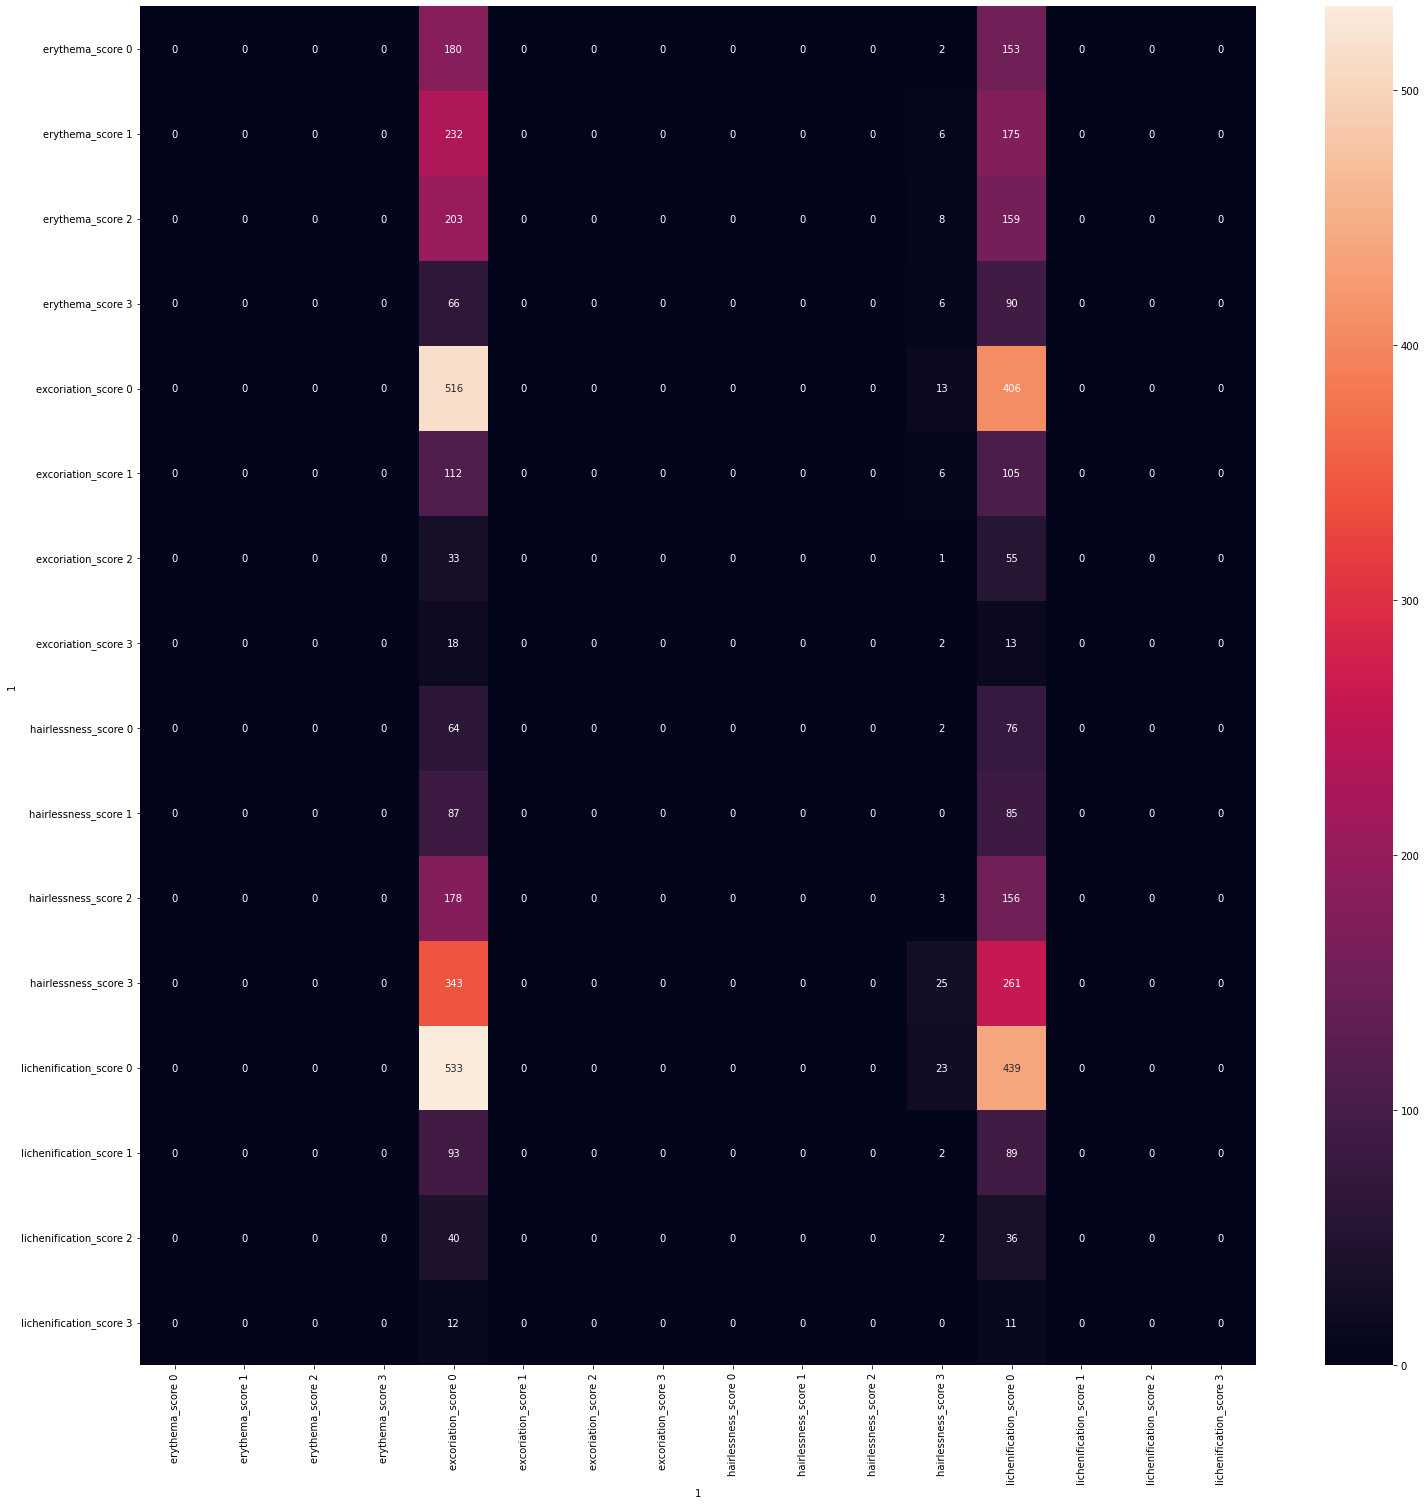

In [154]:
get_prediction(net,trainloader,classify)

In [ ]:
def train_model_exer(net, loss, optimizer, num_epochs):
    
    loss_hist = {'train': [], 'val': []}
    acc_hist = {'train': [], 'val': []}
    
    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            if phase == 'train': 
                dataloader = train_loader
                net.train()
            else:
                dataloader = val_loader 
                net.eval()

            running_loss = 0. 
            running_acc = 0.
            
            best_loss = 100.
            best_acc = 0.
            
            best_loss_net = None
            best_acc_net = None

            with tqdm(dataloader, unit='batch') as tepoch:
                tepoch.set_description(f'Epoch {epoch + 1}/{num_epochs}, {phase:5} phase') # seems like tqdm.notebook.tqdm drops repeatable spaces :(
                
                for images, targets in tepoch:
                    images, targets = images.to(device), targets.to(device)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train'):
                        preds = net(images)
                        loss_value = loss(preds, targets)
                        preds_class = preds.argmax(dim=1)
                        if phase == 'train':
                            loss_value.backward()
                            optimizer.step()

                    running_loss += loss_value.item()
                    running_acc += (preds_class == targets.data).float().mean().item()
                    
                
                epoch_loss = running_loss / len(dataloader)
                epoch_acc = running_acc / len(dataloader)
                
                loss_hist[phase].append(epoch_loss)
                acc_hist[phase].append(epoch_acc)
                
                if phase == 'val':
                    
                    if  epoch_loss < best_loss:
                        best_loss = epoch_loss
                        best_loss_net = copy.deepcopy(net)

                    if epoch_acc > best_acc:
                        best_acc = epoch_acc
                        best_acc_net = copy.deepcopy(net)
                        
                tepoch.set_postfix(loss=f'{epoch_loss:.5f}', accuracy=f'{epoch_acc:.5f}')
                print(epoch_loss)
    print(best_acc, best_loss)
    return best_loss_net, best_acc_net, net, loss_hist, acc_hist